# Airbnb in Amsterdam
In this project we will analyse the various Airbnb listings in Amsterdam. Airbnb doesn't provide its data to the public, but the website [Inside Airbnb](insideairbnb.com) does some fancy web-scraping of the Airbnb website for some major cities across the globe and compiles these into readable .csv files.

We will start by crunching some numbers in these files and then we will visualize the data. But first, we load some necessary libraries and read in the csv files (this may take a while, because they are pretty large).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapefile as shp
import seaborn as sns

%matplotlib inline

In [2]:
!ls data

bbga_latest_and_greatest.csv     neighbourhoods.csv
calendar.csv                     noord-holland-latest-free.shp
listings.csv                     reviews.csv
listings_summary.csv             reviews_summary.csv
metadata_latest_and_greatest.csv


In [3]:
calendar = pd.read_csv('data/calendar.csv')
listings = pd.read_csv('data/listings.csv')
listings_summary = pd.read_csv('data/listings_summary.csv')
reviews = pd.read_csv('data/reviews.csv')
reviews_summary = pd.read_csv('data/reviews_summary.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's do some exploratory analysis of the listing file first.


In [4]:
print(listings.shape)
print(listings.columns)
print(listings.head())

(20030, 96)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       

## Neighbourhood analysis
We want to get an overview of the distribution of listings per neighbourhood in Amsterdam. Note that there are three columns with neighbourhood in the title: ``neighbourhood``, `neighbourhood_cleansed` and `neighbourhood_group_cleansed`. We check out the differences first.


In [5]:
print(listings['neighbourhood'].unique())

['Indische Buurt' 'Spaarndammer en Zeeheldenbuurt' 'Grachtengordel'
 'Westelijke Eilanden' 'Bos en Lommer' 'Amsterdam Centrum'
 'Hoofddorppleinbuurt' nan 'Oud-Zuid' 'Jordaan'
 'Oostelijke Eilanden en Kadijken' 'De Pijp' 'Oud-West' 'Zeeburg'
 'Nieuwmarkt en Lastage' 'Museumkwartier' 'De Wallen' 'Slotervaart'
 'Nieuwendammerdijk en Buiksloterdijk' 'Rivierenbuurt' 'Stadionbuurt'
 'Weesperbuurt en Plantage' 'Oosterparkbuurt' 'Watergraafsmeer'
 'IJplein en Vogelbuurt' 'Volewijck' 'Banne Buiksloot' 'Oost'
 'Frederik Hendrikbuurt' 'Slotermeer-Zuidwest' 'Overtoomse Veld'
 'Buitenveldert-West' 'Buikslotermeer' 'Buiksloterham' 'Oostzanerwerf'
 'Slotermeer-Noordoost' 'Nieuwendam-Noord' 'Landelijk Noord' 'Osdorp'
 'Tuindorp Oostzaan' 'Kadoelen' 'Tuindorp Nieuwendam' 'Buitenveldert-Oost'
 'Tuindorp Buiksloot' 'Nieuwendammerham']


In [6]:
print(listings['neighbourhood_cleansed'].unique())

['Oostelijk Havengebied - Indische Buurt' 'Westerpark' 'Centrum-Oost'
 'Centrum-West' 'Bos en Lommer' 'Zuid' 'De Pijp - Rivierenbuurt'
 'De Baarsjes - Oud-West' 'Oud-Oost' 'Slotervaart' 'Gaasperdam - Driemond'
 'Oud-Noord' 'Noord-Oost' 'Watergraafsmeer' 'IJburg - Zeeburgereiland'
 'Geuzenveld - Slotermeer' 'Buitenveldert - Zuidas' 'Bijlmer-Oost'
 'Noord-West' 'De Aker - Nieuw Sloten' 'Osdorp' 'Bijlmer-Centrum']


In [7]:
print(listings['neighbourhood_group_cleansed'].unique())

[nan]


The column `neighbourhood_cleansed` corresponds to the 22 areas ("Gebieden" in Dutch) Amsterdam has. And to make it even more complicated, Amsterdam also has 7 districts ("Stadsdelen" in Dutch) See the [official map](https://maps.amsterdam.nl/gebiedsindeling/) for more information. So we use this column to obtain a distribution of the listings per neighbourhood.

In [8]:
listings['neighbourhood_cleansed'].value_counts()

De Baarsjes - Oud-West                    3515
De Pijp - Rivierenbuurt                   2493
Centrum-West                              2326
Centrum-Oost                              1730
Westerpark                                1490
Zuid                                      1441
Oud-Oost                                  1282
Bos en Lommer                             1145
Oostelijk Havengebied - Indische Buurt     959
Oud-Noord                                  571
Watergraafsmeer                            552
IJburg - Zeeburgereiland                   452
Slotervaart                                393
Noord-West                                 320
Buitenveldert - Zuidas                     262
Noord-Oost                                 257
Geuzenveld - Slotermeer                    212
Osdorp                                     159
De Aker - Nieuw Sloten                     142
Gaasperdam - Driemond                      122
Bijlmer-Centrum                            111
Bijlmer-Oost 

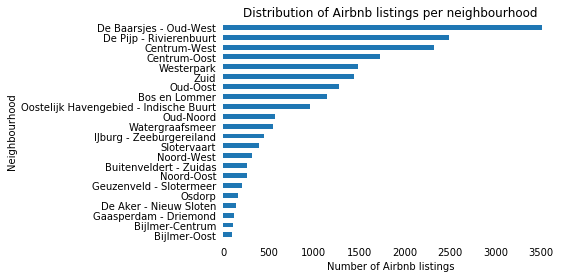

In [9]:
ax = listings['neighbourhood_cleansed'].value_counts(ascending=True).plot.barh()
ax.tick_params(bottom=False, left=False, top=False, right=False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xlabel('Number of Airbnb listings')
ax.set_ylabel('Neighbourhood')
ax.set_title('Distribution of Airbnb listings per neighbourhood')
plt.show()

We see that De Baarsjes/Oud-West is by far the most popular neighbourhood. However, this is also one of the largest neighbourhoods in Amsterdam. So we might want to compute a relative statistic (e.g. number of listings per 1000 homes/appartments) as well.

In order to do that we need some data about the areas. Luckily the city of Amsterdam provides this via this [link](https://data.amsterdam.nl/datasets/G5JpqNbhweXZSw). It's again a pretty big file, so it might take a while to load in the data.


In [10]:
bbga = pd.read_csv('data/bbga_latest_and_greatest.csv',sep=";")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
print(bbga.columns)
print(bbga.head())

Index(['jaar', 'gebiedcode15', 'variabele', 'waarde'], dtype='object')
   jaar gebiedcode15 variabele    waarde
0  2015         STAD     BBC_P      20.0
1  2005         STAD   BEV0_17  140615.0
2  2006         STAD   BEV0_17  139742.0
3  2007         STAD   BEV0_17  138806.0
4  2008         STAD   BEV0_17  138608.0


From the documentation file (`metadata_latest_and_greatest.csv`) we obtain that the variable `WVOORRBAG` contains the number of houses. So let's see.

In [12]:
bbga[(bbga['variabele'] == "WVOORRBAG") & (bbga['jaar'] == 2018)]

,jaar,gebiedcode15,variabele,waarde
5468,2018,STAD,WVOORRBAG,432632.0
54786,2018,B,WVOORRBAG,35.0
54787,2018,A,WVOORRBAG,54260.0
54788,2018,T,WVOORRBAG,40785.0
54789,2018,N,WVOORRBAG,43245.0
54790,2018,Z,WVOORRBAG,NaN
54791,2018,M,WVOORRBAG,68700.0
54792,2018,K,WVOORRBAG,80243.0
54793,2018,F,WVOORRBAG,67155.0
54794,2018,E,WVOORRBAG,78209.0


This column contains the number of houses per district ("stadsdeel", these are letters "A", "F", etc), zip code (1066, 1060, etc.) and also district (DX09, DX15, etc.). The latter is what we want. Using the metadata provided by the city of Amsterdam we can recode these abbrevations to the districts names corresponding to the Inside Airbnb dataset.

In [13]:
districts = {'DX01': 'Centrum-West',
'DX02': 'Centrum-Oost',
'DX03': 'Westerpark',
'DX04': 'Bos en Lommer',
'DX05': 'De Baarsjes - Oud-West',
'DX06': 'Geuzenveld - Slotermeer',
'DX07': 'Osdorp',
'DX08': 'De Aker - Nieuw Sloten',
'DX09': 'Slotervaart',
'DX10': 'Zuid',
'DX11': 'Buitenveldert - Zuidas',
'DX12': 'De Pijp - Rivierenbuurt',
'DX13': 'Oud-Oost',
'DX14': 'Oostelijk Havengebied - Indische Buurt',
'DX15': 'Watergraafsmeer',
'DX16': 'IJburg - Zeeburgereiland',
'DX17': 'Noord-West',
'DX18': 'Oud-Noord',
'DX19': 'Noord-Oost',
'DX20': 'Bijlmer-Centrum',
'DX21': 'Bijlmer-Oost',
'DX22': 'Gaasperdam - Driemond',
          }

In [14]:
df_houses_districts = pd.DataFrame(bbga[(bbga['jaar'] == 2018) 
                            & (bbga['gebiedcode15'].str.startswith('DX')) 
                            & (bbga['variabele'] == 'WVOORRBAG')]).set_index('gebiedcode15')
df_houses_districts = df_houses_districts.rename(districts,axis='index')

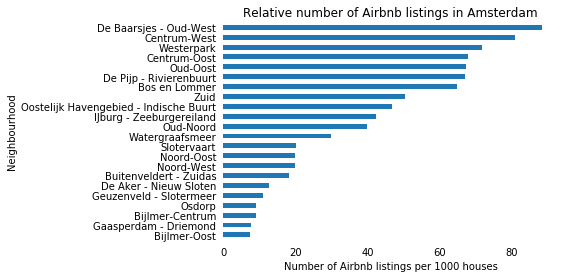

In [15]:
listings_per_1000houses = listings['neighbourhood_cleansed'].value_counts() / (df_houses_districts['waarde'] / 1000)

ax = listings_per_1000houses.sort_values().plot.barh()
ax.tick_params(bottom=False, left=False, top=False, right=False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xlabel('Number of Airbnb listings per 1000 houses')
ax.set_ylabel('Neighbourhood')
ax.set_title('Relative number of Airbnb listings in Amsterdam')
plt.show()

Also in this picture, De Baarsjes/Oud-West is the most popular district for Airbnb hosts: more than 80 listings per 1000 houses! That means that close to 10% of all houses in this distritct are listed on Airbnb. In fact, for renters it is most of the time illegal to list their house on Airbnb, so the relative listing percentage will actually be higher.
At the lower side, the Bijlmer districts and Osdorp are still the least popular for hosts.

## Price analysis
Next, it would be interesting to investigate the price differences across the different neighbourhoods. We can use the `groupby()` method in Pandas to do this. But first we need to clean the price column since it contains the dollar sign and Pandas can't do arithmetic on it.

In [16]:
listings['price_dol'] = pd.to_numeric(listings['price'].str.replace("$","").str.replace(",",""))
listings['price_dol'].describe()

count    20030.000000
mean       152.181178
std        145.828976
min          0.000000
25%         96.000000
50%        125.000000
75%        175.000000
max       8500.000000
Name: price_dol, dtype: float64

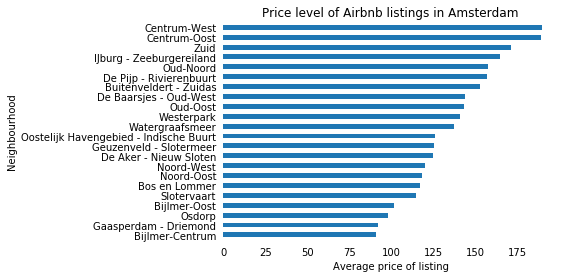

In [17]:
ax = listings.groupby('neighbourhood_cleansed').mean()['price_dol'].sort_values().plot.barh()
ax.tick_params(bottom=False, left=False, top=False, right=False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xlabel('Average price of listing')
ax.set_ylabel('Neighbourhood')
ax.set_title('Price level of Airbnb listings in Amsterdam')
plt.show()

We see that Centrum offers the most expensive listings (no surprises here) and the cheaper listings can be found in the suburbs of Amsterdam: Bijlmer, Gaasperdam-Driemond and Osdorp. Also not very surprising. One caveat: as can be seen from the `describe()` output, there are a couple of ridiculous prices (8500 per night is the max), so we might want to filter out these.

In [18]:
listings['price_dol'].value_counts().sort_index()

0.0        2
8.0        1
12.0       1
14.0       1
19.0       1
20.0       2
23.0       2
24.0       1
25.0       6
26.0       4
27.0       2
28.0       5
29.0       5
30.0      19
31.0       2
32.0       6
33.0       2
34.0       3
35.0      31
36.0       5
37.0      11
38.0      14
39.0      12
40.0      71
41.0       7
42.0      13
43.0       1
44.0       7
45.0      60
46.0      17
          ..
896.0      1
900.0      7
935.0      1
950.0      2
965.0      1
999.0      6
1000.0     4
1025.0     1
1050.0     1
1095.0     1
1100.0     1
1119.0     1
1190.0     1
1200.0     1
1230.0     1
1250.0     1
1254.0     1
1500.0     1
1600.0     1
2000.0     1
2200.0     1
2500.0     2
3000.0     1
3142.0     1
3900.0     1
4500.0     1
5000.0     1
5040.0     1
8000.0     1
8500.0     1
Name: price_dol, Length: 429, dtype: int64

Well, there is no clear threshold value from which it is immediately visible that prices above it are ridiculous. Two appartments are listed for 2500 dollars, so we can take this as the threshold value.

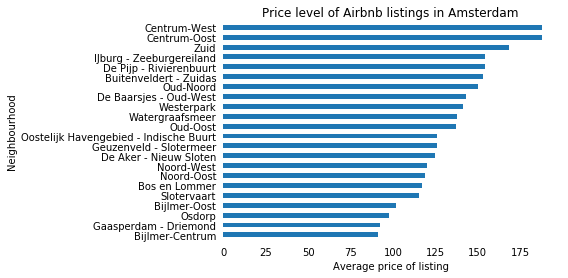

In [19]:
listings_filtered = listings[listings['price_dol'] <= 2500]
ax = listings_filtered.groupby('neighbourhood_cleansed').mean()['price_dol'].sort_values().plot.barh()
ax.tick_params(bottom=False, left=False, top=False, right=False)
for key, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xlabel('Average price of listing')
ax.set_ylabel('Neighbourhood')
ax.set_title('Price level of Airbnb listings in Amsterdam')
plt.show()

The picture is still the same, so the outliers didn't influence the results that much. Allright, you say, this is the average price per listing. But some homes (appartments typically in Amsterdam) are big and some are small, so we should actually calculate an average price per square feet (or per square meter for that matter). Unfortuntaly only 406 out of 20000 listings contain information about the number of square feet of the listing, as can be seen from the `DataFrame.info()` output below. So if we would carry out such an analysis, it wouldn't be very thrustworthy.

In [20]:
listings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20022 entries, 0 to 20029
Data columns (total 97 columns):
id                                  20022 non-null int64
listing_url                         20022 non-null object
scrape_id                           20022 non-null int64
last_scraped                        20022 non-null object
name                                19984 non-null object
summary                             19503 non-null object
space                               14573 non-null object
description                         19898 non-null object
experiences_offered                 20022 non-null object
neighborhood_overview               13253 non-null object
notes                               9028 non-null object
transit                             13631 non-null object
access                              12222 non-null object
interaction                         11970 non-null object
house_rules                         12565 non-null object
thumbnail_url           

## To do
* Visualise the listings data on the map of Amsterdam (using Openstreetmap data e.g.) to obtain a heatmap of populariy, price level, etc. of Airbnb listings in Amsterdam.
* Look at hosts with many listings
* Look at the total availability of listings: 60 days is the legal maximum (in 2018; it will be 30 in 2019).